In [2]:
import os 
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

os.chdir("/Users/friederikebauer/Developer/post-covid-metadatenkatalog/")

from src.download.patients import PatientsDownload
from src.download.airdata_downloader import AirdataDownloader
from src.geolocation.address_transformation import get_long_lat_from_postal_code
from src.utils.graph_configurations import get_index_timeline_plot, get_component_timeline_plot

### Use Case: Von einer Datei alle Patienten extrahieren und für einzelne Patienten Luftdaten anschauen

In [3]:
# Load Patient Data - test data
file = open("data/raw/mii_testdaten.json")
data = json.load(file)

In [4]:
# Extract Patients from Data + select an interesting patient
patients = PatientsDownload()
patients.extract_patients(data = data)
interesting_patient = patients.get_patient_by_id("595")


In [5]:
# Get Air Quality Data
air_data = AirdataDownloader()
interesting_patient.closest_airdata_station = air_data.get_closest_station(lat = interesting_patient.address.latitude, long = interesting_patient.address.longitude)

interesting_patient.airdata_index = air_data.get_luftdaten_index(station_id = interesting_patient.closest_airdata_station["station"]["id"], start_date = "2019-01-01", end_date = "2019-12-31")
interesting_patient.airdata_schadstoffe = air_data.get_luftdaten_schadstoffe(station_id = interesting_patient.closest_airdata_station["station"]["id"], start_date = "2019-01-01", end_date = "2019-12-31")

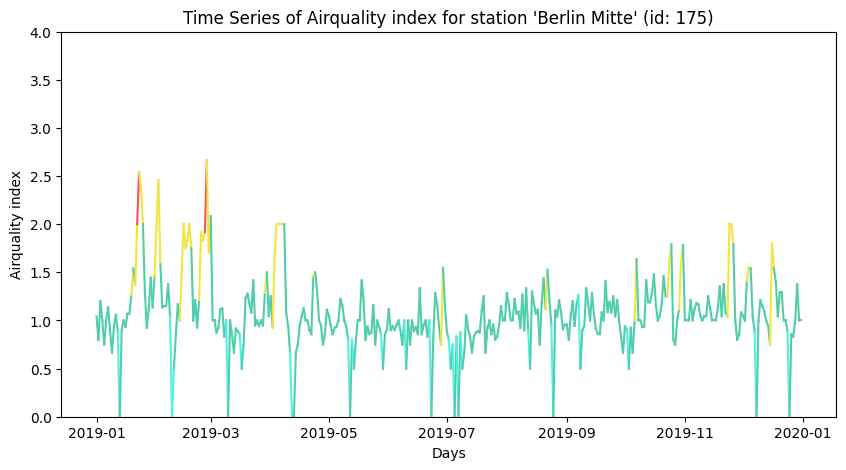

In [6]:
# Visualization of the acquired data: Air Quality Index
get_index_timeline_plot(interesting_patient.airdata_index, interesting_patient.closest_airdata_station)

/Users/friederikebauer/Developer/post-covid-metadatenkatalog/src/utils/graph_configurations.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


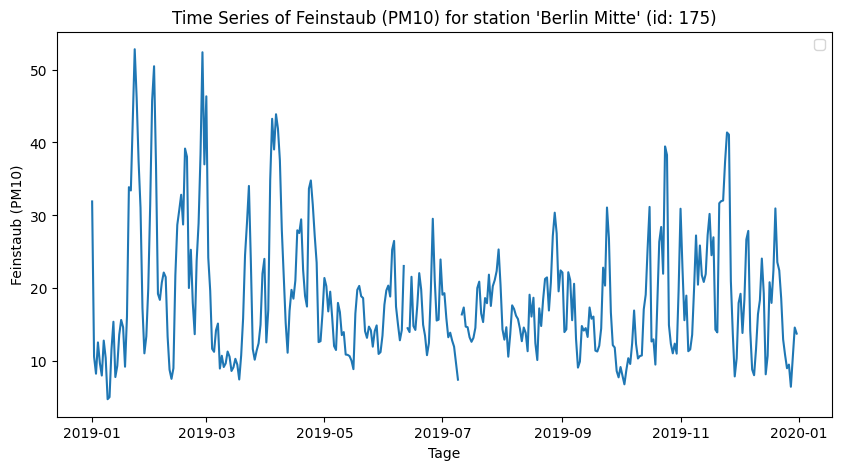

In [7]:
# Visualization of the acquired data: Feinstaub
get_component_timeline_plot(data = interesting_patient.airdata_schadstoffe, component_name = "Feinstaub (PM10)", closest_station=interesting_patient.closest_airdata_station)

/Users/friederikebauer/Developer/post-covid-metadatenkatalog/src/utils/graph_configurations.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


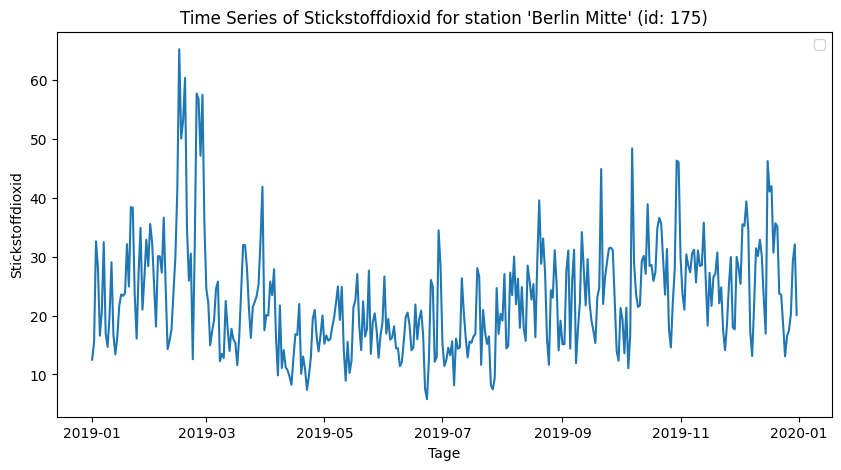

In [8]:
get_component_timeline_plot(data = interesting_patient.airdata_schadstoffe, component_name = "Stickstoffdioxid", closest_station=interesting_patient.closest_airdata_station)

### Beispiel: Unvollständige Postleitzahl -> was passiert bei unvollständiger Postleitzahl?

In [9]:
air_data = AirdataDownloader()
patient_incomplete_address = patients.get_patient_by_id("999")
print(f"The patient with id {patient_incomplete_address.id} has the following incomplete postal code: {patient_incomplete_address.address.postal_code}. Still, with the beginning of the postal code a longitude and latitude was calculated: {patient_incomplete_address.address.longitude} and {patient_incomplete_address.address.latitude}")


The patient with id 999 has the following incomplete postal code: 101. Still, with the beginning of the postal code a longitude and latitude was calculated: 13.39832924 and 52.52263856


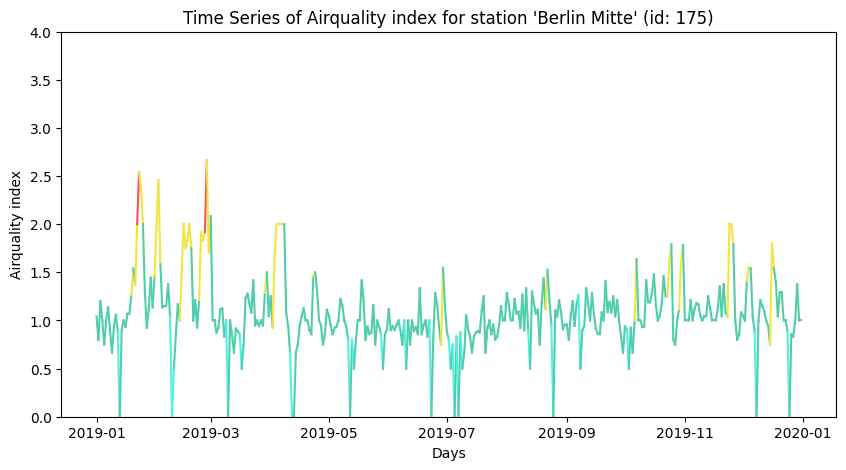

In [10]:
patient_incomplete_address.closest_airdata_station = air_data.get_closest_station(patient_incomplete_address.address.latitude, patient_incomplete_address.address.longitude)
patient_incomplete_address.airdata_index = air_data.get_luftdaten_index(patient_incomplete_address.closest_airdata_station["station"]["id"], start_date = "2019-01-01", end_date = "2019-12-31")
get_index_timeline_plot(interesting_patient.airdata_index, interesting_patient.closest_airdata_station)

### Beispiel: Keine Antwort von Luftdaten-API

In [11]:
air_data = AirdataDownloader()
interesting_patient.closest_airdata_station = air_data.get_closest_station(lat = interesting_patient.address.latitude, long = interesting_patient.address.longitude)

# No data for a station with id = "1" -> warning and None as value written to the patient object
interesting_patient.airdata_index = air_data.get_luftdaten_index(station_id = "1", start_date = "2019-01-01", end_date = "2019-12-31")


/Users/friederikebauer/Developer/post-covid-metadatenkatalog/src/download/airdata_downloader.py:129: UserWarning: No data available for the given request
  warnings.warn("No data available for the given request")


In [12]:
# time gets automatically filled when invalid format, for example invalid end_date '2019-13' is given
interesting_patient.airdata_index = air_data.get_luftdaten_index(station_id = interesting_patient.closest_airdata_station["station"]["id"], start_date = "2019-11-01", end_date = "2019-13")
len(interesting_patient.airdata_index) #-> time is adjusted froms available start date to current date

1839